# Lecture 10:  Vector field plots, Environment management

### Announcements
* Prof Clark's office hours are cancelled on Feb 20 (Prof Teuben still available)
* HW4 due tomorrow at midnight (like usual)


## Today: 2/19
1. Plotting a vector field with quiver() and streamplot().
2. Example: E-field of electric multipole
3. Environment management
4. Plotting widgets

### Quiver and Stream plots

`ax.quiver()` and `ax.streamplot()` are useful for plotting 2D vector fields in the
xy plane. `ax.quiver()` populates the plane with small arrows at each domain grid
point; `ax.streamplot` attempts to connect together the arrows into continuous
field lines.

<bound method Figure.tight_layout of <Figure size 640x480 with 2 Axes>>

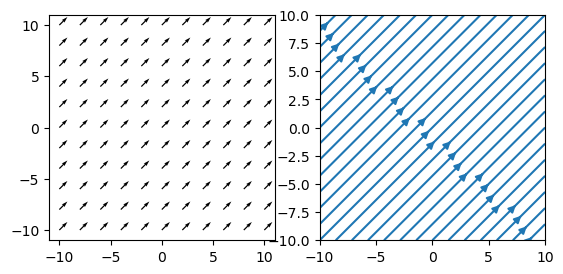

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax_quiver, ax_stream) = plt.subplots(1,2)

xvals = np.linspace(-10,10,11)
yvals = np.linspace(-10,10,11)

VX = np.ones((11,11))
VY = np.ones((11,11))

X,Y = np.meshgrid(xvals,yvals)

ax_quiver.quiver(X,Y,VX,VY)
ax_stream.streamplot(X,Y,VX,VY, density=0.5)
ax_quiver.set_aspect("equal")
ax_stream.set_aspect("equal")
fig.tight_layout

### Example: electric multipoles

Let's do a more-interesting physics example. The field lines of a multipole system. The total e-field is summed across charges
$$
\vec{E}_{tot} = \sum_i \vec{E}_i
$$
where the field of the $i$-th charge $Q$ is:
$$
\vec{E}_i = k\frac{Q_i}{r_i^2}\hat{r_i}
$$

Let's plot this up in the xy plane for a simple dipole. A charge of -Q at (x,y)=(-1,0) and another of +Q at (x,y)=(+1, 0).

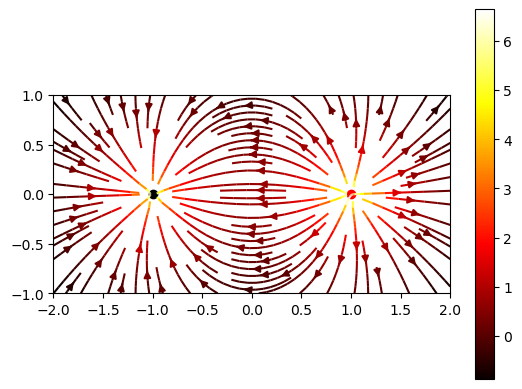

In [3]:
#create the figure
fig, ax = plt.subplots(1,1)

#draw charges
ax.plot([-1], [0], "ko")
ax.plot([+1], [0], "ro")

#evaluate over some grid(building the grid)
ny = 32
y = np.linspace(-1, 1, ny)
nx = 64
x = np.linspace(-2, 2, nx)
x_grid, y_grid = np.meshgrid(x,y)

#building container to hold Efield
#each field needs to be size ny x nx
#ny is the number of *rows*(up/down, y_space)
#nx is the number of *columns*(left/right, x_space)
Ex = np.zeros((ny,nx))
Ey = np.zeros((ny,nx))

def Efield(q, x_q, y_q, x, y):
    if np.isclose(x,x_q) and np.isclose(y,y_q):
        ex = np.nan
        ey = np.nan
    else:
        r_squared = np.sqrt((x-x_q)**2 + (y-y_q)**2)**2
        vec_r = np.array([x-x_q, y-y_q])
        vec_r_hat = vec_r/np.linalg.norm(vec_r)
        ex = q/r_squared * vec_r_hat[0] #x component
        ey = q/r_squared * vec_r_hat[1] #y component
    return ex, ey

#fill containers
Q1 = -1
Q2 = +1
for y in range(ny): #visit all y points(all *rows*)
    for x in range(nx): #visit all x points(all *columns*)
        #calculate efield of q1
        e_q1_x, e_q1_y = Efield(Q1, -1, 0, x_grid[y,x], y_grid[y,x])
        #calculate efield of q2
        e_q2_x, e_q2_y = Efield(Q2, +1, 0, x_grid[y,x], y_grid[y,x])
        #update container
        Ex[y,x] += (e_q1_x + e_q2_x)
        Ey[y,x] += (e_q1_y + e_q2_y)

# ax.streamplot(x_grid, y_grid, Ex, Ey)
colors = np.log(np.hypot(Ex, Ey))
import matplotlib.cm as cm
stream = ax.streamplot(x_grid, y_grid, Ex, Ey, color=colors, cmap=cm.hot)

cbar = fig.colorbar(stream.lines)
ax.set_aspect("equal")

## Environment Management

### Reminder: What is a programming language?

You might be wondering "where your python comes from."

Remember: computers know how to **execute machine code** ("computer programs"). There are many programming languages you can use to generate that machine code, and python is one of them.

The "core" of the python language is the *Python Standard Library*: https://docs.python.org/3/library/index.html.
There are many *external* libraries which have been written, e.g. numpy, matplotlib, and scipy.

This broad "collection" -- your python executable, the standard library, and any external libraries -- defines your python "environment."

The main "entry point" into the python kernel is an executable called `python`. It, and all its support libraries, are stored in a folder somewhere on your computer. Let's see where (you can see mine is in `/Users/brianclark/`). JDL is calling this version of python behind the scenes for you when you work in your notebook.

In jupyter notebook, we can access these "system" commands by using the `!` operator. In this case, we will call the `python` executable, and pass it a single argument `--version`.


In [21]:
! python --version

Python 3.13.0


### Where to get your python

Some computer systems come with a "base" installation of python as part of the operating system. **Using this version of python is almost always BAD idea.** Because:
* It is usually outdated (OSs have to be frozen many months before release)
* More importantly: If you break it (somehow, someway), it usually ruins your broader operating system (and therefore, your computer). This is bad, bad!

Instead, you could install python some other way. There is a very large number of ways to manage your python installations and environments. See e.g. https://www.daytona.io/dotfiles/the-ultimate-guide-to-managing-python-environments.

In fact, when you downloaded JDL, it came with such an environment manager behind the scenes. We can use it to make a new one. Let's do that now.



### Installing new packages & Interactive plots

Say you find a package you'd like to install. The most common tool for doing is called `pip`. Many of the best packages you will want exist on the "Python Package Index." In which case you can do e.g. `pip install PACKAGENAME`.

So, let's do that with two useful packages for animations: ipywidgets and ipympl.

And then let's make a 3D grid of points that we can then manipulate.